# Iris Flower classification

## Import Necessary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from tabulate import tabulate

## Read Dataset

In [2]:
DataFrame=pd.read_csv('Iris.csv')

In [3]:
DataFrame.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
DataFrame.shape

(150, 6)

In [5]:
df=DataFrame.copy()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


# Data preprocessing

## 1. Null Values

In [8]:
df.isnull()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
145,False,False,False,False,False,False
146,False,False,False,False,False,False
147,False,False,False,False,False,False
148,False,False,False,False,False,False


In [9]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# Detecting Outliers and capping

## Function to calculate lower and upper bounds

In [10]:
def Bounds(col):
    q1=col.quantile(0.25)
    q3=col.quantile(0.75)
    IQR=q3-q1
    u_bound,l_bound=q3+1.5*IQR,q1-1.5*IQR
    return l_bound,u_bound

In [11]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

(array([ 9., 23., 14., 27., 16., 26., 18.,  6.,  5.,  6.]),
 array([4.3 , 4.66, 5.02, 5.38, 5.74, 6.1 , 6.46, 6.82, 7.18, 7.54, 7.9 ]),
 <BarContainer object of 10 artists>)

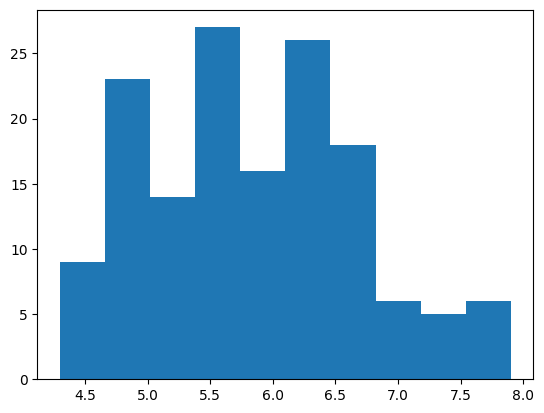

In [12]:
plt.hist('SepalLengthCm',data=df)

{'whiskers': [<matplotlib.lines.Line2D at 0x1d3c19c7290>,
 'caps': [<matplotlib.lines.Line2D at 0x1d3c19d4d50>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d3c19c6550>],
 'medians': [<matplotlib.lines.Line2D at 0x1d3c19d6390>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d3c19c7210>],
 'means': []}

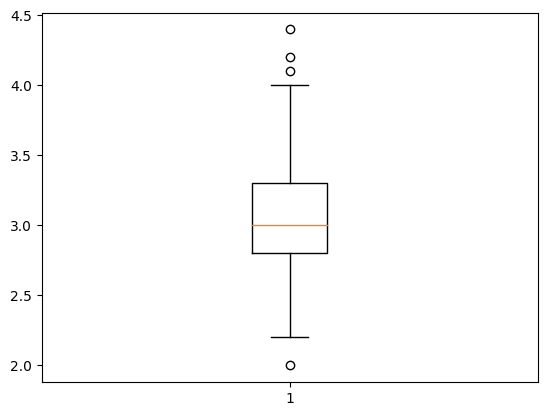

In [13]:
plt.boxplot('SepalWidthCm',data=df)

In [14]:
lower_SepalWidthCm,upper_SepalWidthCm=Bounds(df['SepalWidthCm'])
df['SepalWidthCm']=np.clip(df['SepalWidthCm'],lower_SepalWidthCm,upper_SepalWidthCm)

{'whiskers': [<matplotlib.lines.Line2D at 0x1d3df27df10>,
 'caps': [<matplotlib.lines.Line2D at 0x1d3df27f750>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d3df27d2d0>],
 'medians': [<matplotlib.lines.Line2D at 0x1d3df28ce50>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d3df28d890>],
 'means': []}

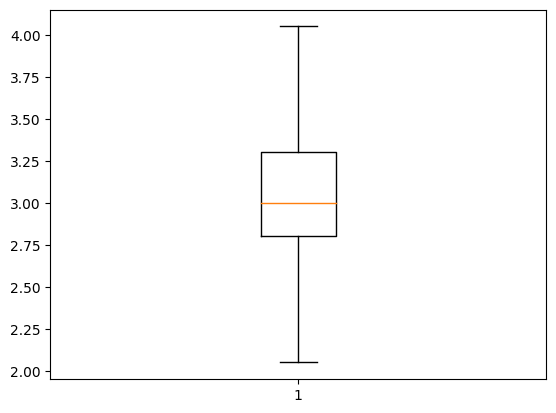

In [15]:
plt.boxplot('SepalWidthCm',data=df)

{'whiskers': [<matplotlib.lines.Line2D at 0x1d3df2f3810>,
 'caps': [<matplotlib.lines.Line2D at 0x1d3df2fcf90>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d3df2f29d0>],
 'medians': [<matplotlib.lines.Line2D at 0x1d3df2fe610>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d3df2fefd0>],
 'means': []}

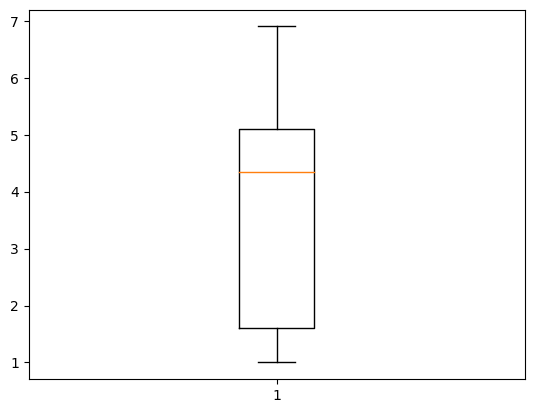

In [16]:
plt.boxplot('PetalLengthCm',data=df)

{'whiskers': [<matplotlib.lines.Line2D at 0x1d3df11bcd0>,
 'caps': [<matplotlib.lines.Line2D at 0x1d3df125550>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d3df11b010>],
 'medians': [<matplotlib.lines.Line2D at 0x1d3df1269d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d3df124f90>],
 'means': []}

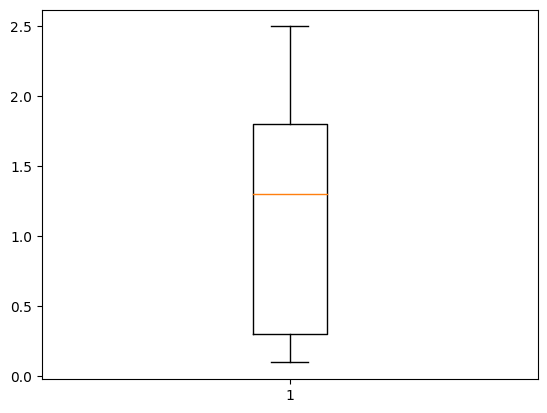

In [17]:
plt.boxplot('PetalWidthCm',data=df)

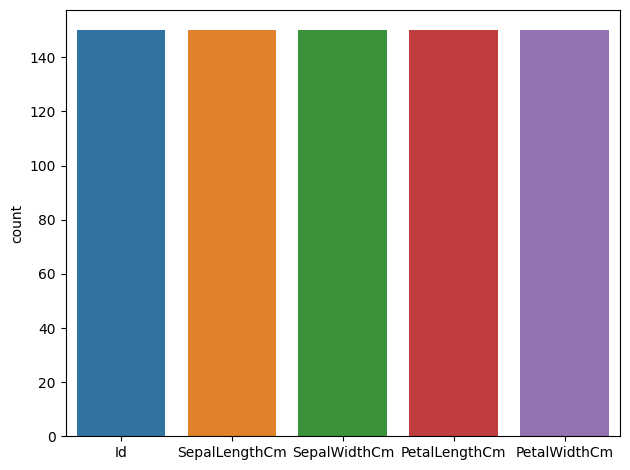

In [18]:
sns.countplot(df)
plt.tight_layout()

In [19]:
df.columns


Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

# Label Encoding

In [20]:
labelInstance=LabelEncoder()

In [21]:
y_Encoded=labelInstance.fit_transform(df['Species'])

In [22]:
y_Encoded

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [23]:
df['Species']=DataFrame['Species']

In [24]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [25]:
df['y_Encoded']=y_Encoded

In [26]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,y_Encoded
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0
...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica,2
146,147,6.3,2.5,5.0,1.9,Iris-virginica,2
147,148,6.5,3.0,5.2,2.0,Iris-virginica,2
148,149,6.2,3.4,5.4,2.3,Iris-virginica,2


In [27]:
df.drop('Species',axis=1,inplace=True)

In [28]:
df.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,y_Encoded
Id,1.000000,0.716676,-0.397267,0.882747,0.899759,0.942830
SepalLengthCm,0.716676,1.000000,-0.110343,0.871754,0.817954,0.782561
SepalWidthCm,-0.397267,-0.110343,1.000000,-0.419823,-0.355582,-0.419264
PetalLengthCm,0.882747,0.871754,-0.419823,1.000000,0.962757,0.949043
PetalWidthCm,0.899759,0.817954,-0.355582,0.962757,1.000000,0.956464
y_Encoded,0.942830,0.782561,-0.419264,0.949043,0.956464,1.000000


# Train test and split

In [29]:
X=df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y=df['y_Encoded']

In [30]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.20,train_size=0.80)

## Model Logistic Regression

In [31]:
logit=LogisticRegression(solver='liblinear',max_iter=1000)

In [32]:
logit.fit(X_train,y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

## Prediction Analysis

In [33]:
predictions=logit.predict(X_test)

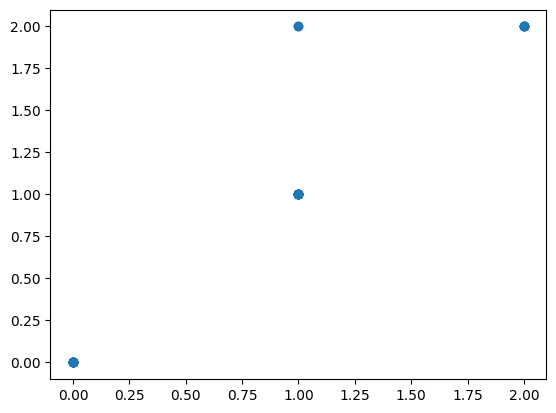

In [34]:
plt.scatter(y_test,predictions)

## F1 Score

In [35]:
f1_score=metrics.f1_score(y_test,predictions,average='weighted')
print("F1 score is ",f1_score)

F1 score is  0.9358585858585857


In [36]:
confusion_matrix=metrics.confusion_matrix(y_test,predictions)

## Confusion Matrix

In [37]:
print(confusion_matrix)

[[13  0  0]
 [ 0 10  2]
 [ 0  0  5]]


## Accuracy Score

In [38]:
accuracy_score=metrics.accuracy_score(y_test,predictions)

In [39]:
print('Accuracy Score is ',accuracy_score*100,'%')

Accuracy Score is  93.33333333333333 %


## Precision Score

In [40]:
precision_score=metrics.precision_score(y_test,predictions,average='weighted')
print('Precision Score is ',precision_score)

Precision Score is  0.9523809523809524


## Recall Score

In [41]:
Recall_score=metrics.recall_score(y_test,predictions,average='weighted')
print('Recall Score is ',Recall_score)

Recall Score is  0.9333333333333333
